 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_data = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_data, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_data = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_data, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_data = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_data, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)

In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$" , "")
sp500_df["Close"] = sp500_df["Close"].str.replace("," , "")
sp500_df["Close"] = sp500_df["Close"].astype(float)
sp500_df

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [11]:
# Calculate Daily Returns
sp500_dr = sp500_df.pct_change()
sp500_dr

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [12]:
# Drop nulls
sp500_dr = sp500_dr.dropna()
sp500_dr.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
columns = ['SP500']
sp500_dr.columns = columns
sp500_dr.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_col = pd.concat([sp500_dr, algo_df, whale_df], axis="columns", join="inner")
portfolio_col.sort_index(inplace=True)
portfolio_col

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

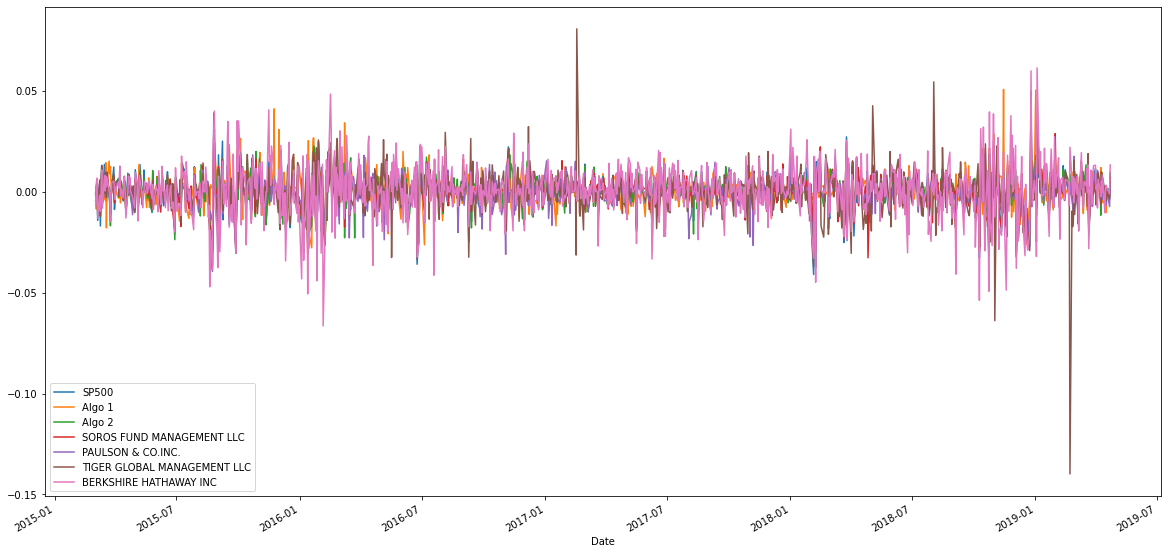

In [15]:
# Plot daily returns of all portfolios
portfolio_col.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

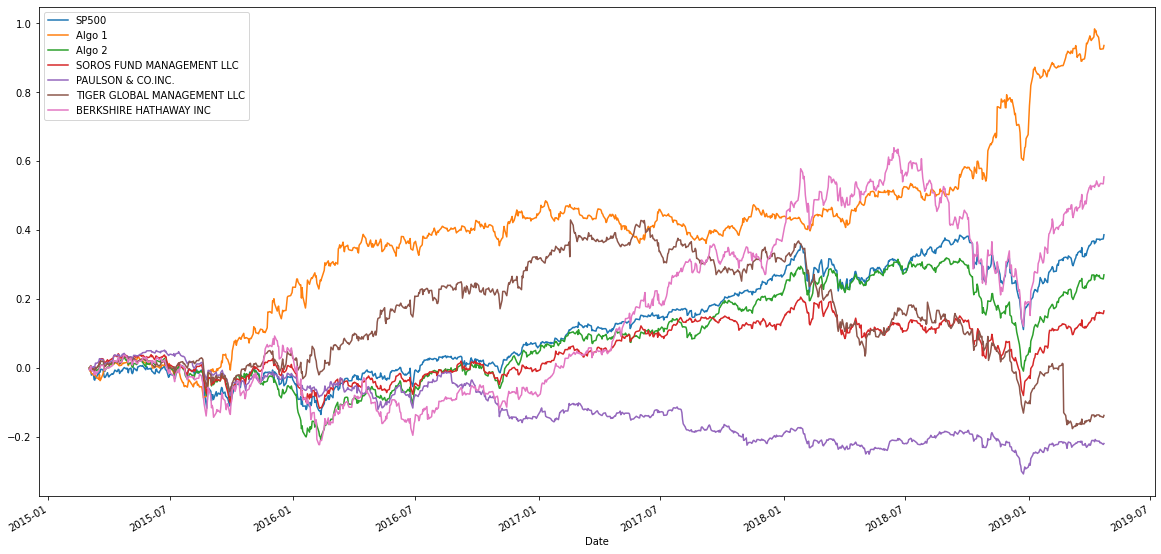

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_col).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

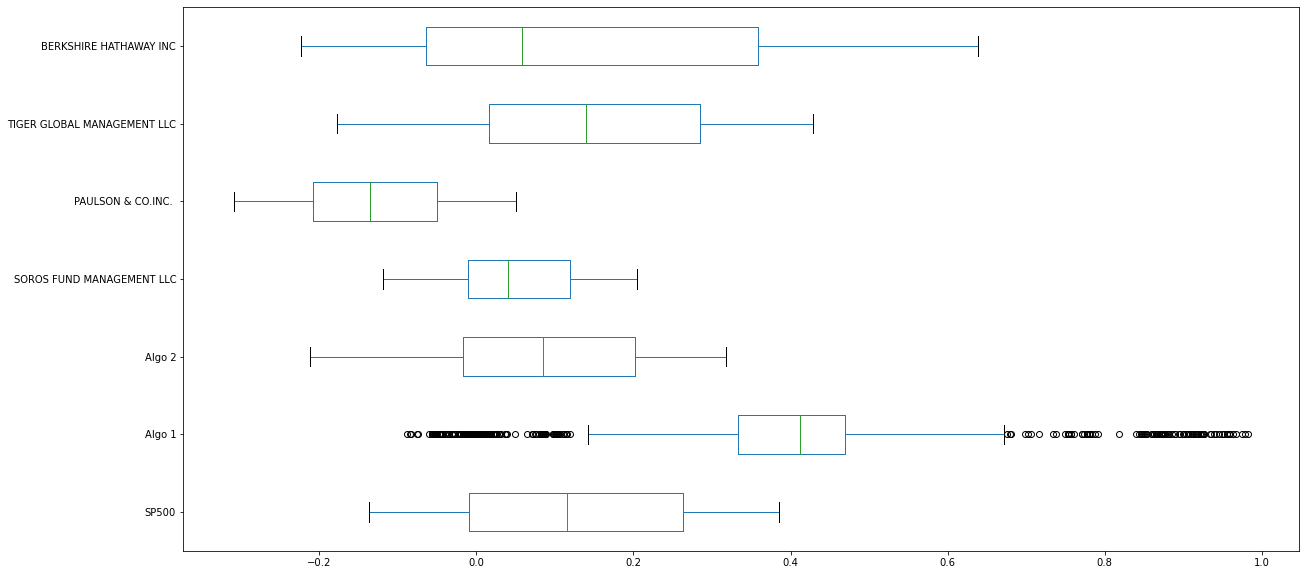

In [17]:
# Box plot to visually show risk
cumulative_returns.plot.box(vert=False, figsize=(20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
cumulative_std = cumulative_returns.std()
cumulative_std.head()

SP500                        0.144448
Algo 1                       0.232277
Algo 2                       0.131700
SOROS FUND MANAGEMENT LLC    0.073238
PAULSON & CO.INC.            0.088455
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_dr.std()

# Determine which portfolios are riskier than the S&P 500
cumulative_std = cumulative_std.sort_values(ascending=False)
cumulative_std.head()

BERKSHIRE HATHAWAY INC         0.241575
Algo 1                         0.232277
TIGER GLOBAL MANAGEMENT LLC    0.149844
SP500                          0.144448
Algo 2                         0.131700
dtype: float64

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
cumulative_an_std = cumulative_std * np.sqrt(252)
cumulative_an_std.head()

BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
TIGER GLOBAL MANAGEMENT LLC    2.378706
SP500                          2.293036
Algo 2                         2.090678
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

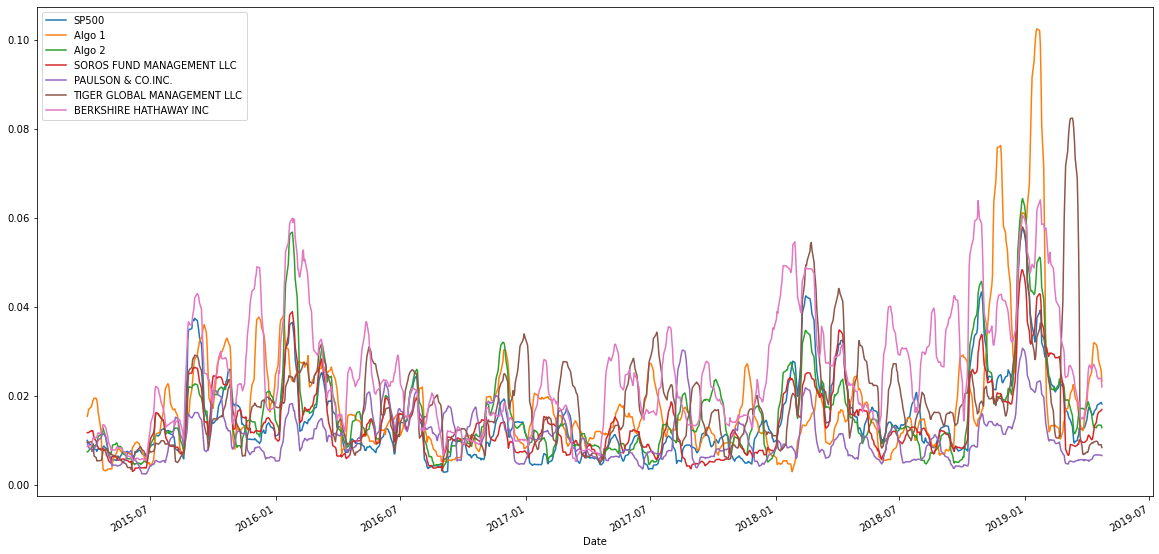

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cumulative_std21 = cumulative_returns.rolling(window=21).std().dropna()
cumulative_std21.head()

# Plot the rolling standard deviation
cumulative_std21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [22]:
# Calculate the correlation
cumulative_cor = cumulative_returns.corr()

# Display de correlation matrix
cumulative_cor

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SP500,1.000000,0.740215,0.965884,0.875512,-0.853201,0.131595,0.938546
Algo 1,0.740215,1.000000,0.588982,0.470156,-0.830635,0.052669,0.579663
Algo 2,0.965884,0.588982,1.000000,0.915163,-0.767196,0.177653,0.945500
SOROS FUND MANAGEMENT LLC,0.875512,0.470156,0.915163,1.000000,-0.653129,0.327728,0.898896
PAULSON & CO.INC.,-0.853201,-0.830635,-0.767196,-0.653129,1.000000,-0.193595,-0.780559
TIGER GLOBAL MANAGEMENT LLC,0.131595,0.052669,0.177653,0.327728,-0.193595,1.000000,0.031632
BERKSHIRE HATHAWAY INC,0.938546,0.579663,0.945500,0.898896,-0.780559,0.031632,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [23]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [24]:
# Use `ewm` to calculate the rolling window
#Must get guidance on this from Sammy
#df['ewma']=df['value'].ewm(halflife=3).mean()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios


In [26]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [46]:
# Reading data from 1st stock
goog_data = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, infer_datetime_format=True, parse_dates=True).drop(columns = ['Symbol'])
goog_df.rename(columns={'Trade DATE':'Date', 'NOCP':'GOOG'}, inplace=True)
goog_df.set_index(goog_df['Date'], inplace=True)
goog_df.drop(columns = ['Date'], inplace=True)
goog_df.head()

,GOOG
Date,
5/9/2019,1162.38
5/8/2019,1166.27
5/7/2019,1174.10
5/6/2019,1189.39
5/3/2019,1185.40


In [48]:
# Reading data from 2nd stock
cost_data = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, infer_datetime_format=True, parse_dates=True).drop(columns = ['Symbol'])
cost_df.rename(columns={'Trade DATE':'Date', 'NOCP':'COST'}, inplace=True)
cost_df.set_index(cost_df['Date'], inplace=True)
cost_df.drop(columns = ['Date'], inplace=True)
cost_df.head()

,COST
Date,
5/9/2019,243.47
5/8/2019,241.34
5/7/2019,240.18
5/6/2019,244.23
5/3/2019,244.62


In [52]:
# Reading data from 3rd stock
aapl_data = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, infer_datetime_format=True, parse_dates=True).drop(columns = ['Symbol'])
aapl_df.rename(columns={'Trade DATE':'Date', 'NOCP':'AAPL'}, inplace=True)
aapl_df.set_index(aapl_df['Date'], inplace=True)
aapl_df.drop(columns = ['Date'], inplace=True)
aapl_df.head()

,AAPL
Date,
5/9/2019,200.72
5/8/2019,202.90
5/7/2019,202.86
5/6/2019,208.48
5/3/2019,211.75


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!